In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import notebookCompanion
import math
import statistics
import imagePreprocessing as IP

lacuna = cv.imread("../images/training_data/001.jpg")

# notebookCompanion.showImage(lacuna)

/home/talitajames/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


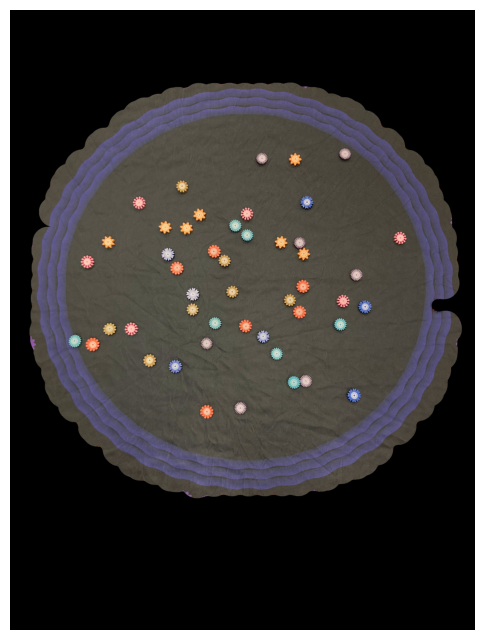

In [4]:
lacunaCircle = IP.cropToCircle(lacuna)
notebookCompanion.showImage(lacunaCircle)

../images/training_data/000.jpg


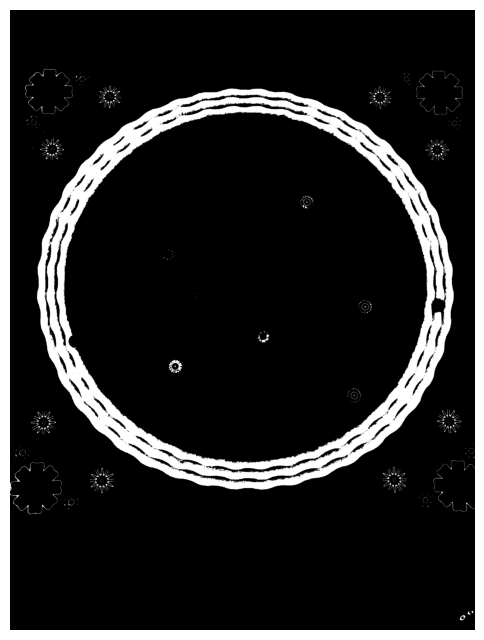

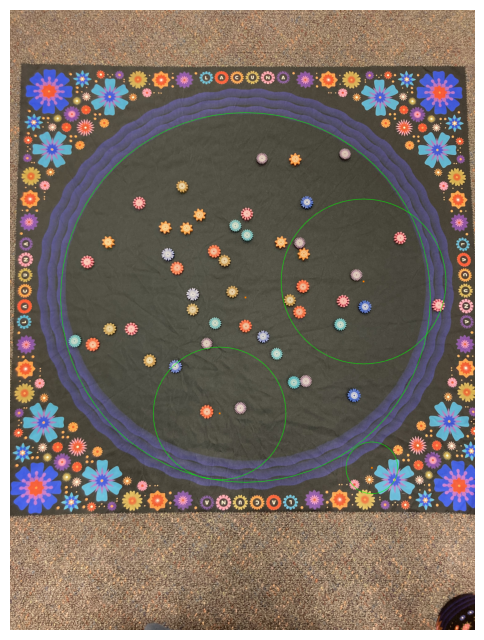

../images/training_data/001.jpg


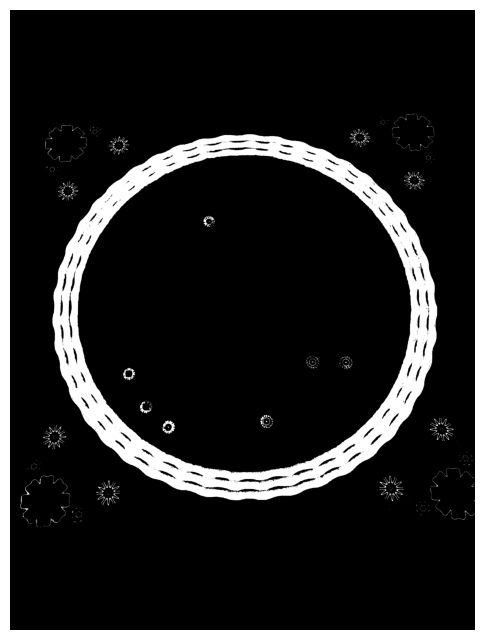

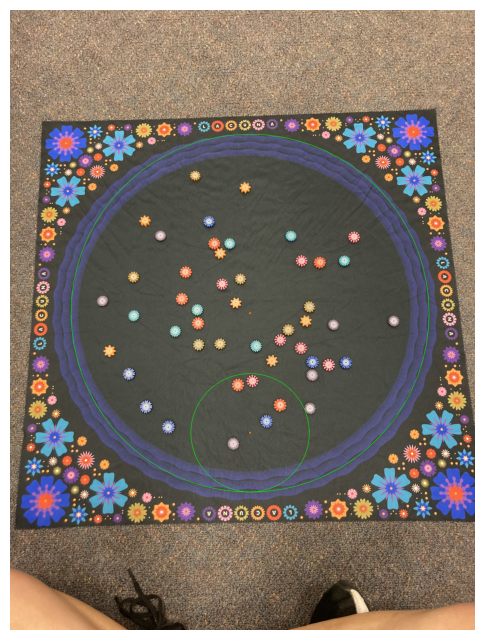

../images/training_data/002.jpg


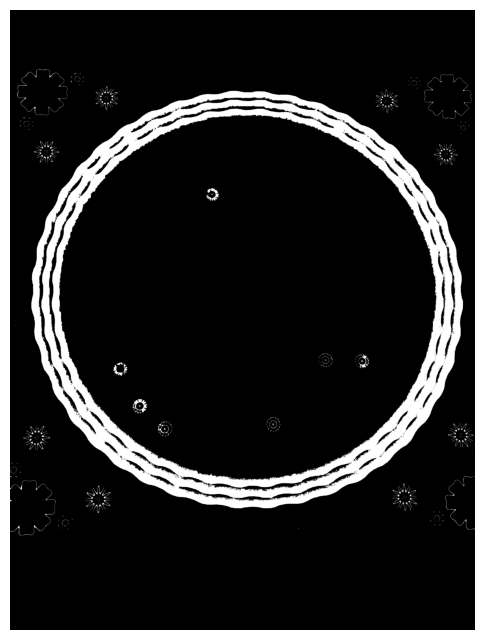

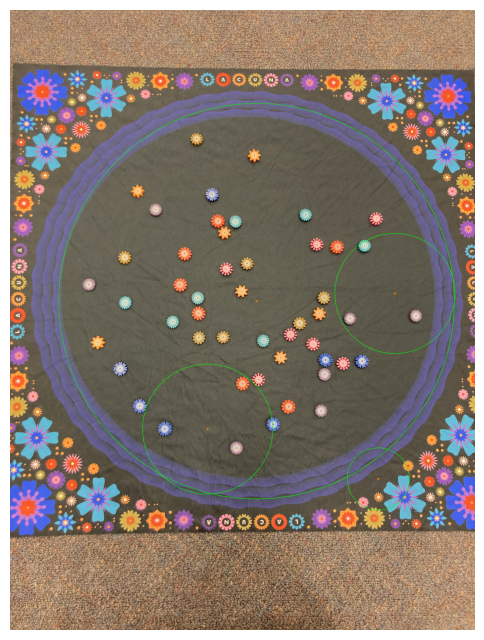

../images/training_data/003.jpg


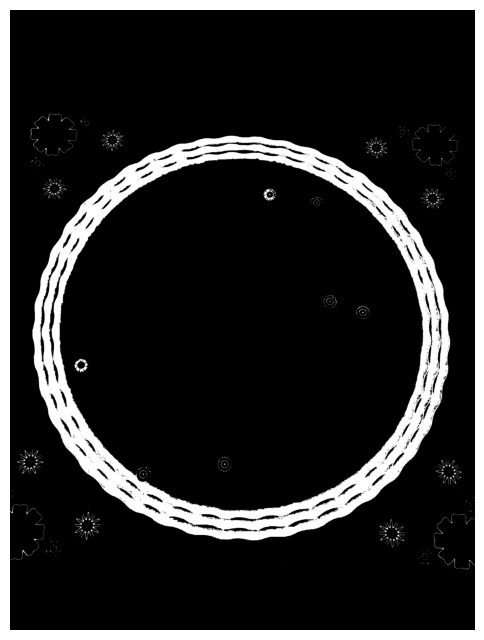

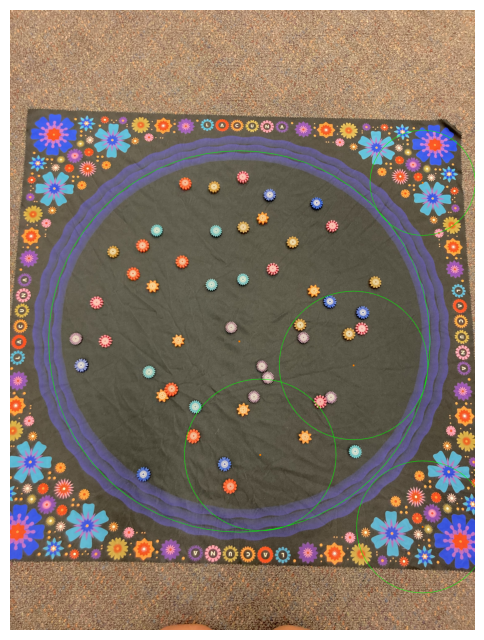

../images/training_data/004.jpg


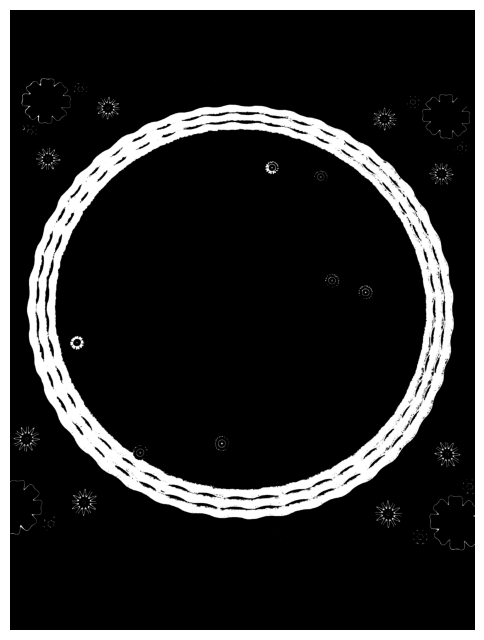

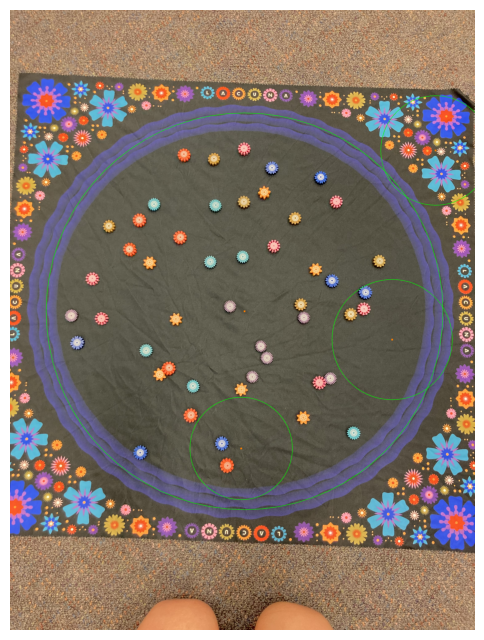

../images/training_data/005.jpg


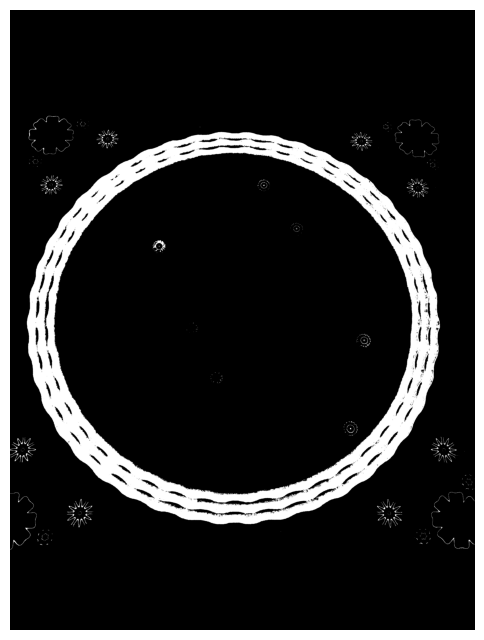

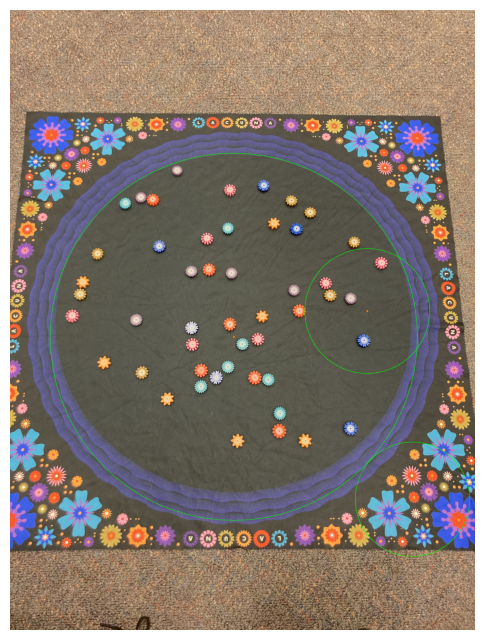

../images/training_data/006.jpg


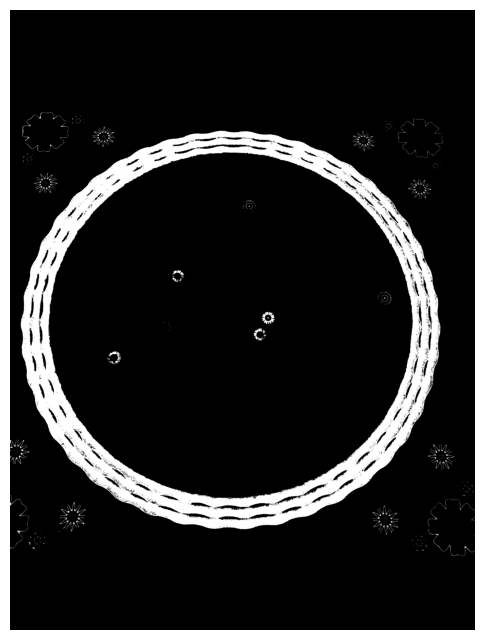

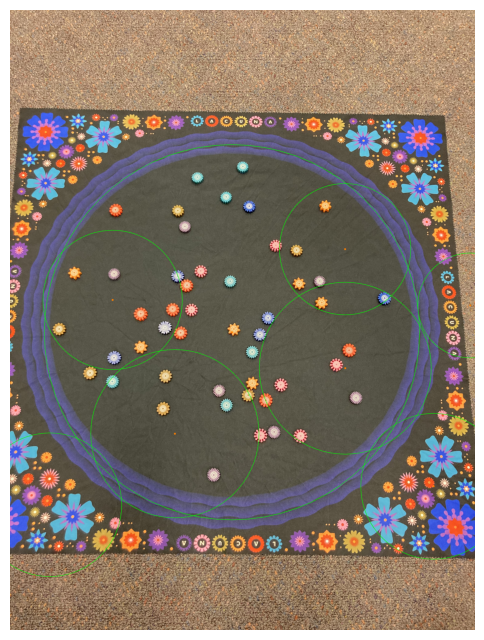

../images/training_data/007.jpg


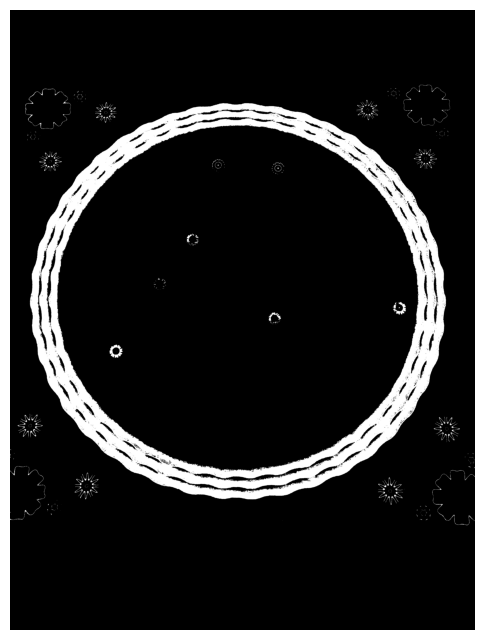

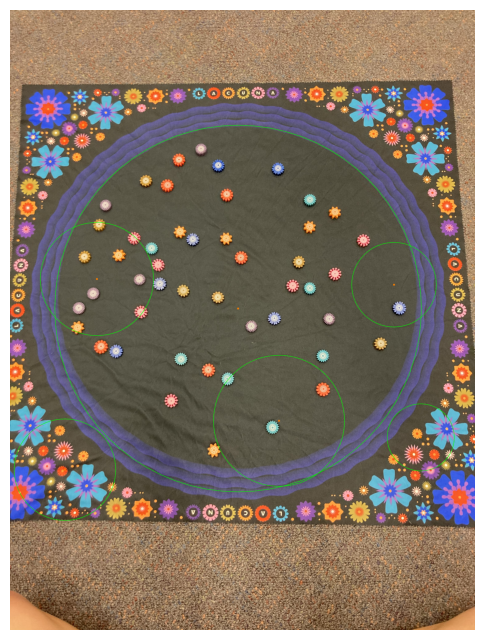

../images/training_data/008.jpg


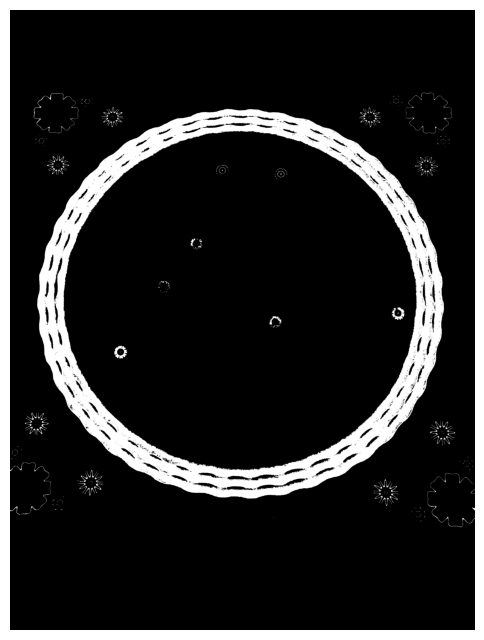

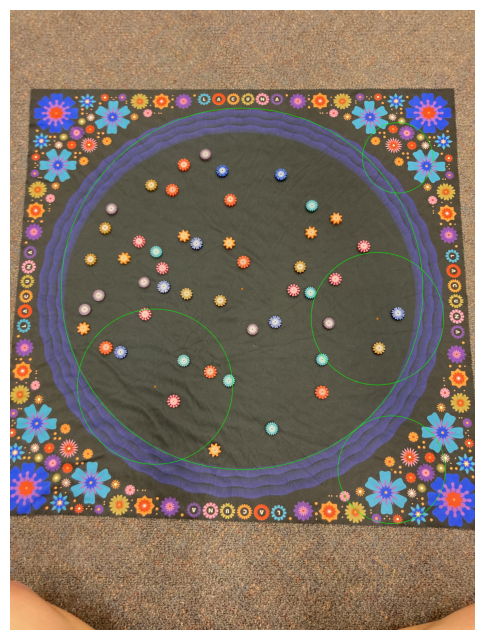

../images/training_data/009.jpg


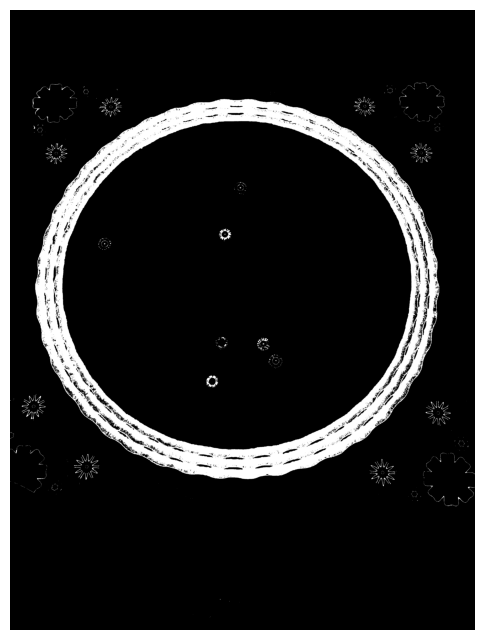

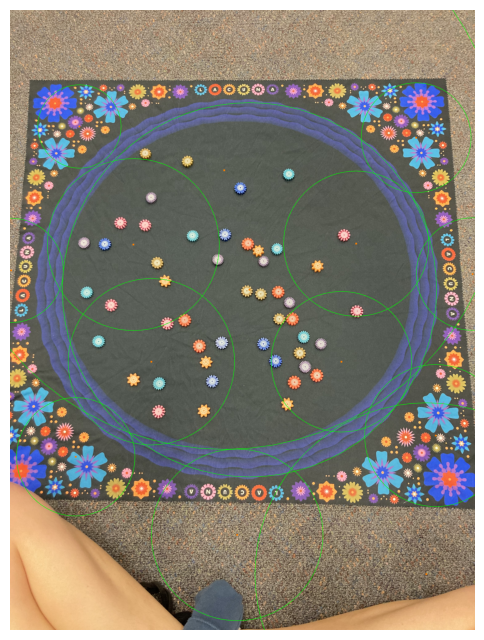

../images/training_data/010.jpg


In [ ]:
colourRangeAqua = ([110, 130], [50, 100], [0,255])

for i in range(30):
    i_filepath = f"../images/training_data/{i:03}.jpg"
    lacuna = cv.imread(i_filepath)
    print(i_filepath)
    # lacunaFilteredOne = IP.hsvColorFilterTupple(lacunaCircle, colourRangeAqua)
    lacunaAquaCircle = IP.hsvColorFilterTupple(lacuna, colourRangeAqua)
    gray = cv.cvtColor(lacunaAquaCircle, cv.COLOR_BGR2GRAY)
    _,bw = cv.threshold(gray,50,255,cv.THRESH_BINARY)

    circles = cv.HoughCircles(bw, cv.HOUGH_GRADIENT, 1.2, 750)
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv.circle(lacuna, (x, y), r, (0, 255, 0), 2)
            cv.rectangle(lacuna, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), 2)
            
        # find the circle that has the center closest to the middle

    # notebookCompanion.showImage(bw)
    notebookCompanion.showImage(lacuna)
# cv.imwrite('out/progress/hsv_image_aqua.jpg', lacunaFilteredOne)

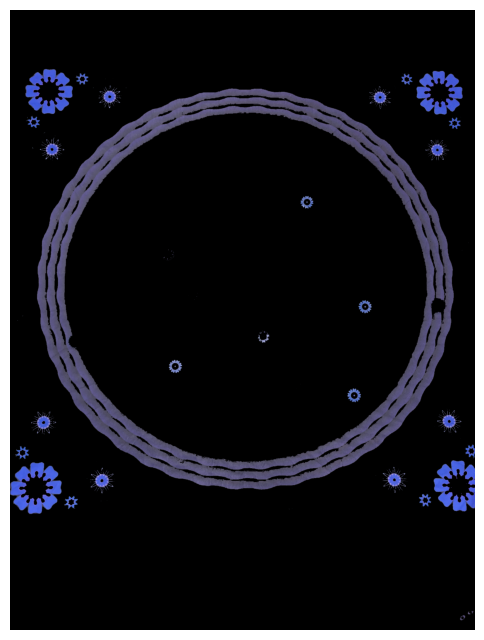

In [7]:

# Convert BGR to HSV
hsv = cv.cvtColor(lacuna, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
lacunaAquaCircle2 = cv.bitwise_and(lacuna,lacuna, mask= mask)

notebookCompanion.showImage(lacunaAquaCircle2)

In [79]:
circles = cv.HoughCircles(lacunaAquaCircle, cv.HOUGH_GRADIENT,1,20, param1=50, param2=30, minRadius=0,maxRadius=0)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/hough.cpp:2269: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'HoughCircles'


In [ ]:
lacunaAquaCircle
cv.imwrite('out/progress/hsv_image_purple.jpg')